In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

In [2]:
# Read the dataset
df = pd.read_csv("cancer.csv")

# Unnamed 32 is an unnecessary feature with no data point
# id is unique for all the patient and should not be used as a feature
# So, I will drop these columns
df = df.drop(["id","Unnamed: 32"], axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Diagnosis is a string column
# All other columns are float
# No null value is present.

In [4]:
# Displaying all columns
pd.set_option('display.max_columns', None)

In [5]:
# Check out the first few data points
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# As we can see, "diagnosis" is our target column.
# We need to label encode this column.
# All other columns are our features.

In [6]:
# Check column names
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

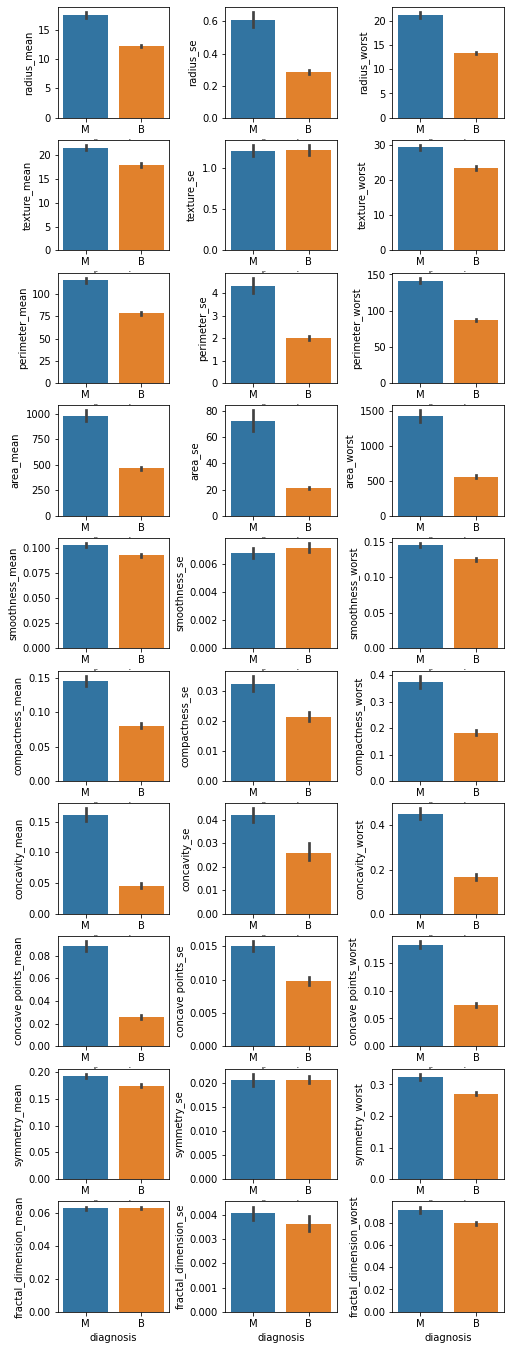

In [7]:
# Visualising feature importance with bar plot
# I have plotted bar plots for different features
# In the x axis we have two diagnosis classes, Benign and Malignant
# y axis represent the mean of the feature corresponding to the class
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots(10,3, figsize=(8,24))
fig.subplots_adjust(wspace=0.5)
# Row 1
sns.barplot(x="diagnosis", y="radius_mean",  data =df, ax=ax[0,0])
sns.barplot(x="diagnosis", y="radius_se",    data =df, ax=ax[0,1])
sns.barplot(x="diagnosis", y="radius_worst", data =df, ax=ax[0,2])

# Row 2
sns.barplot(x="diagnosis", y="texture_mean",  data =df, ax=ax[1,0])
sns.barplot(x="diagnosis", y="texture_se",    data =df, ax=ax[1,1])
sns.barplot(x="diagnosis", y="texture_worst", data =df, ax=ax[1,2])

# Row 3
sns.barplot(x="diagnosis", y="perimeter_mean",  data =df, ax=ax[2,0])
sns.barplot(x="diagnosis", y="perimeter_se",    data =df, ax=ax[2,1])
sns.barplot(x="diagnosis", y="perimeter_worst", data =df, ax=ax[2,2])

# Row 4
sns.barplot(x="diagnosis", y="area_mean",  data =df, ax=ax[3,0])
sns.barplot(x="diagnosis", y="area_se",    data =df, ax=ax[3,1])
sns.barplot(x="diagnosis", y="area_worst", data =df, ax=ax[3,2])

# Row 5
sns.barplot(x="diagnosis", y="smoothness_mean",  data =df, ax=ax[4,0])
sns.barplot(x="diagnosis", y="smoothness_se",    data =df, ax=ax[4,1])
sns.barplot(x="diagnosis", y="smoothness_worst", data =df, ax=ax[4,2])

# Row 6
sns.barplot(x="diagnosis", y="compactness_mean",  data =df, ax=ax[5,0])
sns.barplot(x="diagnosis", y="compactness_se",    data =df, ax=ax[5,1])
sns.barplot(x="diagnosis", y="compactness_worst", data =df, ax=ax[5,2])

# Row 7
sns.barplot(x="diagnosis", y="concavity_mean",  data =df, ax=ax[6,0])
sns.barplot(x="diagnosis", y="concavity_se",    data =df, ax=ax[6,1])
sns.barplot(x="diagnosis", y="concavity_worst", data =df, ax=ax[6,2])

# Row 8
sns.barplot(x="diagnosis", y="concave points_mean",  data =df, ax=ax[7,0])
sns.barplot(x="diagnosis", y="concave points_se",    data =df, ax=ax[7,1])
sns.barplot(x="diagnosis", y="concave points_worst", data =df, ax=ax[7,2])

# Row 9
sns.barplot(x="diagnosis", y="symmetry_mean",  data =df, ax=ax[8,0])
sns.barplot(x="diagnosis", y="symmetry_se",    data =df, ax=ax[8,1])
sns.barplot(x="diagnosis", y="symmetry_worst", data =df, ax=ax[8,2])

# Row 10
sns.barplot(x="diagnosis", y="fractal_dimension_mean",  data =df, ax=ax[9,0])
sns.barplot(x="diagnosis", y="fractal_dimension_se",    data =df, ax=ax[9,1])
sns.barplot(x="diagnosis", y="fractal_dimension_worst", data =df, ax=ax[9,2])

In [9]:
# Plot interpretation:
##########################################################
# Let's look at the bar plot corresponding to the
# radius_mean
# From the bar plot it is evident that the mean radius
# corresponding to two different classes varies significantly.
# Mean radius corresponding to the benign class is significantly smaller
# than that of the malignant class. This makes sense.
# As we know benign stage is the initial stage and we can expect smaller overall radius corresponding to the benign class.
# So, "radius_mean" should be an important feature for this classification problem.

# Now, let's look at the plot corresponding to 
# texture_se
# There is no significant difference between the mean values corresponding to
# two different classes. So, "texture_se" should not be an important class according to my visual analysis.

In [10]:
# Again to substantiate the points mentioned above,
# we can perform the chisqured test for feature importance

In [11]:
# Chi square test for feature selection
from sklearn.feature_selection import chi2

# Label Encoding Needed for chi2 module to work properly
df.replace({"diagnosis": {"B":0,"M":1}}, inplace=True)

X = df.drop('diagnosis',axis=1)
y = df['diagnosis']
chi_scores = chi2(X,y)
p_val = pd.Series(chi_scores[1],index = X.columns)

# Dependent features according to Chi-Squared Test
# we are using 95% confidence interval for this test
print("Important fetures are:")
print("-----------------------------------")
imp_features = []
for col in X.columns:
  if p_val.loc[col] <= 0.05:
    print(col, "p value:", round(p_val.loc[col],3))
    imp_features.append(col)

Important fetures are:
-----------------------------------
radius_mean p value: 0.0
texture_mean p value: 0.0
perimeter_mean p value: 0.0
area_mean p value: 0.0
compactness_mean p value: 0.02
concavity_mean p value: 0.0
concave points_mean p value: 0.001
radius_se p value: 0.0
perimeter_se p value: 0.0
area_se p value: 0.0
radius_worst p value: 0.0
texture_worst p value: 0.0
perimeter_worst p value: 0.0
area_worst p value: 0.0
compactness_worst p value: 0.0
concavity_worst p value: 0.0
concave points_worst p value: 0.0


In [13]:
len(imp_features)

17

In [ ]:
# According to chi2 test, there are 17 important features
# So, we will build the model with these 17 features

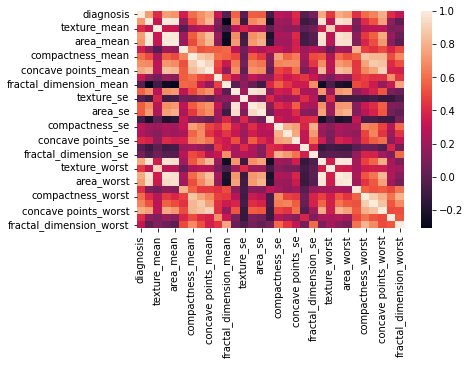

In [59]:
# Feature correlation analysis
sns.heatmap(df.corr())

In [14]:
# Medical dataset could be highly imbalanced.
# So, I will check for that.
df["diagnosis"].value_counts(normalize=True)*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [ ]:
# Dataset contains 63% Benign (Class 0) and 37% (Class 1) Malignant classes
# Though the Benign class contains higher fraction of data points
# we can't say it truly imbalanced.

In [15]:
# Model: I will use only the important featues from the chi2 analysis
# Define Features and Target
X = df[imp_features]
y = df["diagnosis"]
X.shape, y.shape

((569, 17), (569,))

In [16]:
# Splitting into train-test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30, random_state=42)

X_train.shape, X_test.shape

((398, 17), (171, 17))

In [17]:
# Scaling all the features:
# I will use Min Max Scaling here as some ML models don't accept negative values.
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [22]:
# All Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics  import accuracy_score
from sklearn.metrics import roc_auc_score

classifiers = [LogisticRegression(), SVC(), GaussianNB(), MultinomialNB(),
               SGDClassifier(), KNeighborsClassifier(), DecisionTreeClassifier(),
               RandomForestClassifier(), GradientBoostingClassifier(),
               LGBMClassifier(), XGBClassifier()]

model_stat = []
for clf in classifiers:
  model = clf
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  model_stat.append([clf, round(roc_auc_score(y_pred,y_test),4)])

In [25]:
sorted(model_stat, key=lambda l:l[1], reverse= True)

[[SVC(), 0.9749],
 [SGDClassifier(), 0.9737],
 [KNeighborsClassifier(), 0.9736],
 [RandomForestClassifier(), 0.9736],
 [XGBClassifier(), 0.9701],
 [LogisticRegression(), 0.9692],
 [LGBMClassifier(), 0.9654],
 [GradientBoostingClassifier(), 0.9497],
 [GaussianNB(), 0.9322],
 [DecisionTreeClassifier(), 0.9226],
 [MultinomialNB(), 0.8354]]

In [26]:
# According to the results obtained above,
# SVC, SGD, KNN, Random Forest and XGB have very similar AUROC values.
# I will use hyper parameter tuning to further improve the model performance.

In [27]:
# Find SVC default parameters
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
# SVC Grid Search for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Model hyperparameters
gs_params = {'C':       [0.1, 1, 10, 100, 1000, 5000], 
              'gamma':  [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear", "poly", "rbf", "sigmoid"]}

# Initialize a RandomizedSearchCV object using 5-fold CV-
gs_cv = GridSearchCV(estimator = SVC(), 
                     cv = 5, 
                     param_grid = gs_params)

# Train on training data or SMOTEEN
gs_cv.fit(X_train, y_train)

# Print the best parameters
print(gs_cv.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [35]:
grid_pred = gs_cv.predict(X_test)
print("AUROC:", roc_auc_score(grid_pred,y_test))

AUROC: 0.9701094998520272


In [ ]:
# Our SVC Model has the best AUROC of 0.9701

In [ ]:
# Checking Random Forest Model if we can achieve a better AUROC

In [36]:
# Random Forest Default Parameters
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Random Forest Grid Search is Expensive
# I have used random search first and then optimized further with Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

gs_params = {'max_depth':[8,9,10],
              'n_estimators':[150,200,250],
              'max_features':[7,8,9],
              'criterion':['gini','entropy'],
              'min_samples_leaf':[3,4,5],
              'min_samples_split':[5,6,7,8]
          }
gs_cv = RandomizedSearchCV(RandomForestClassifier(), gs_params,
                           cv= 5)

# Train on training data
gs_cv.fit(X_train, y_train)

# Print the best parameters
print(gs_cv.best_params_)

{'n_estimators': 250, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 9, 'max_depth': 9, 'criterion': 'entropy'}


In [48]:
grid_pred = rs_cv.predict(X_test)
print("AUROC:", roc_auc_score(grid_pred,y_test))

AUROC: 0.965424739195231


In [49]:
# Random Forest Has The Best AUROC of 0.9654

In [55]:
# XGBoost Random Search
from xgboost.sklearn import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

rs_params = {'n_estimators': randint(150, 1000),
             'learning_rate': uniform(0.01, 0.6),
             'subsample': uniform(0.1, 0.9),
             'max_depth':list(np.arange(2,10)),
             'colsample_bytree': uniform(0.1, 0.9),
             'min_child_weight': [1, 2, 3, 4]
             }
rs_cv = RandomizedSearchCV(XGBClassifier(), rs_params,
                           cv= 5)

# Train on training data or SMOTEEN
rs_cv.fit(X_train, y_train)

# Print the best parameters
print(rs_cv.best_params_)

{'colsample_bytree': 0.5895925575698587, 'learning_rate': 0.060694088948766524, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 757, 'subsample': 0.4647871016990449}


In [56]:
grid_pred = rs_cv.predict(X_test)
print("AUROC:", roc_auc_score(grid_pred,y_test))

AUROC: 0.9827611719443623


In [ ]:
# XGBoost has the best AUROC of 0.9827

In [52]:
# LGBM GridSearch
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

gs_params = {
        'bagging_fraction': (0.2, 0.8), #min, max
        'bagging_frequency': (2, 8),
        'feature_fraction': (0.2, 0.8),
        'max_depth': list(np.arange(2,16)),
        'min_data_in_leaf': (60, 70, 80, 90, 120),
        'num_leaves': (800, 1000, 1200, 1550)
}

# Initialize a RandomizedSearchCV object using 5-fold CV-
gs_cv = GridSearchCV(estimator=LGBMClassifier(), cv = 5, param_grid=gs_params)

# Train on training data-
gs_cv.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(gs_cv.best_params_)
print(sorted(gs_cv.cv_results_.keys()))

{'bagging_fraction': 0.2, 'bagging_frequency': 2, 'feature_fraction': 0.8, 'max_depth': 2, 'min_data_in_leaf': 90, 'num_leaves': 800}
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_bagging_fraction', 'param_bagging_frequency', 'param_feature_fraction', 'param_max_depth', 'param_min_data_in_leaf', 'param_num_leaves', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [54]:
grid_pred = gs_cv.predict(X_test)
print("AUROC:", roc_auc_score(grid_pred,y_test))

AUROC: 0.9701094998520272


In [ ]:
# LGBM has the best AUROC of 0.9701

In [ ]:
#Conclusion:
# 1. Initial dataset contains 569 rows and each data has 30 features and and a target 
# 2. No, null or missing values noticed
# 3. 63% data belongs to the benign class and 37% data belongs to the malignant class
# 4. I have used Bar plot as well as Chi2 test to select 17 important features out of 30
# 5. Dataset was then splitted into train and test groups
# 6. Initially have used 11 classification models to comapre the performaces
# 7. Based on AUROC score, selected SVC, RandomForestClassifier and XGBoost as they have very high AUROC score
# 8. Used RandomSearchCV and GridSearchCV to further optimize the model performance
# 9. Finally have chosen XGBoost model with AUROC= 0.9828
